1. Open the `categorical` dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?  
    Make any changes you feel are necessary.
4. Plot time variable. Can you extract something from it?
5. The time variable can be useful. You shoud transform its data into a more useful form.
    Hint: Day, week, and month as integers might be useful.


In [1]:
# import pandas as pd #tablas https://pandas.pydata.org/docs/user_guide/pyarrow.html
# import numpy as np #estadistica https://numpy.org/doc/1.25/user/index.html#user
# import matplotlib.pyplot as plt #gráficos https://matplotlib.org/stable/plot_types/index.html
# import seaborn as sns #gráficos https://seaborn.pydata.org/tutorial/regression.html
# from sklearn import linear_model #modelo de regresion https://scikit-learn.org/stable/
# from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_absolute_error
# from datetime import datetime #https://docs.python.org/3/library/datetime.html
# from datetime import timedelta #this is a good time to learn about dates and timestamps. You can find some info here:
# from sklearn.linear_model import LogisticRegression
# from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.neighbors import KNeighborsClassifier
# from scipy.stats import ttest_1samp
# import scipy.stats as st

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Open the `categorical` dataframe we created before.

In [5]:
df = pd.read_csv('categorical.csv')
df

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,3,Agent,Four-Door Car,Medsize
1,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,1,Agent,Two-Door Car,Medsize
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,1,Call Center,SUV,Medsize
3,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,1,Agent,Four-Door Car,Medsize
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,L3,2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,L2,1,Branch,Four-Door Car,Large
8188,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,2,Web,Four-Door Car,Medsize
8189,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,1,Branch,Four-Door Car,Medsize
8190,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,1,Branch,Four-Door Car,Medsize


# 2. Plot all the categorical variables with the proper plot. What can you see?

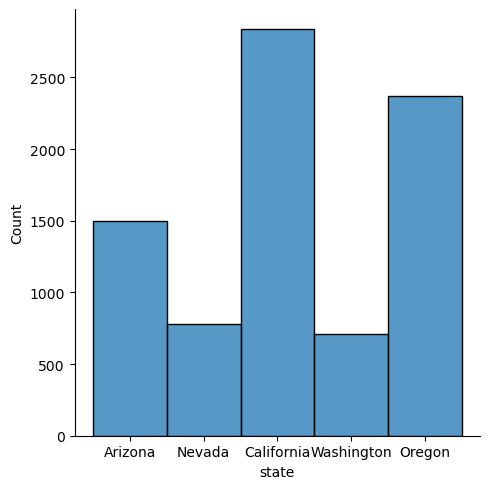

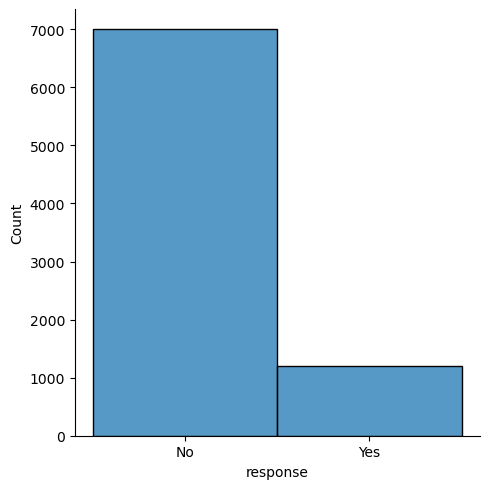

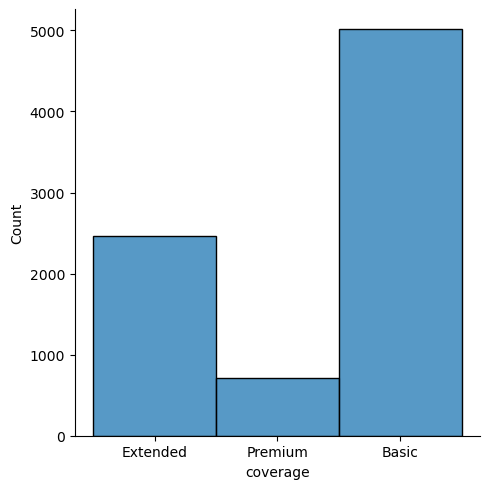

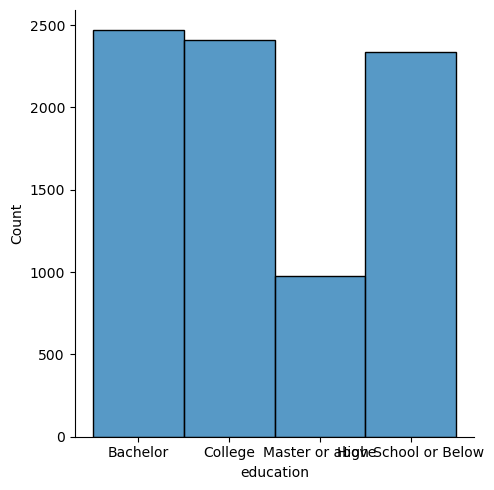

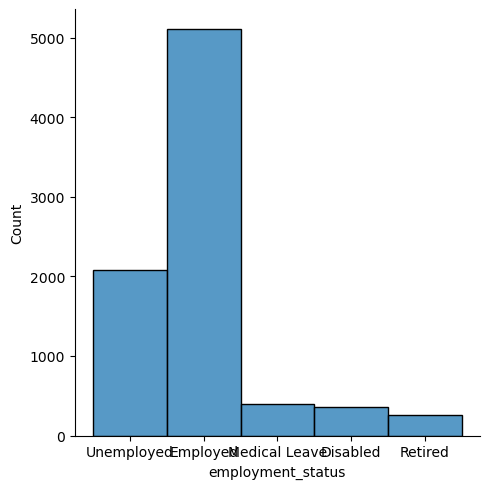

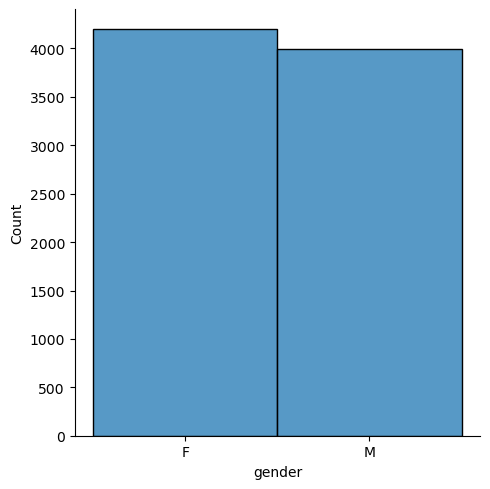

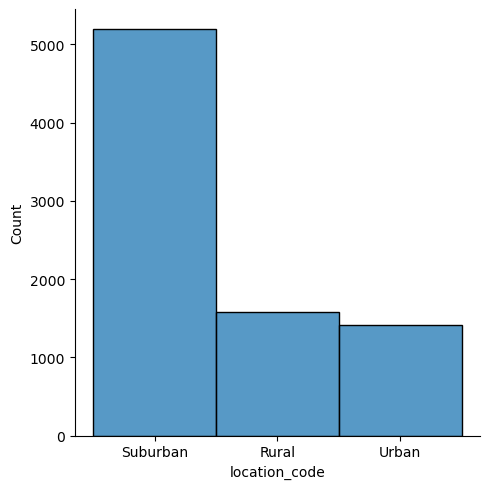

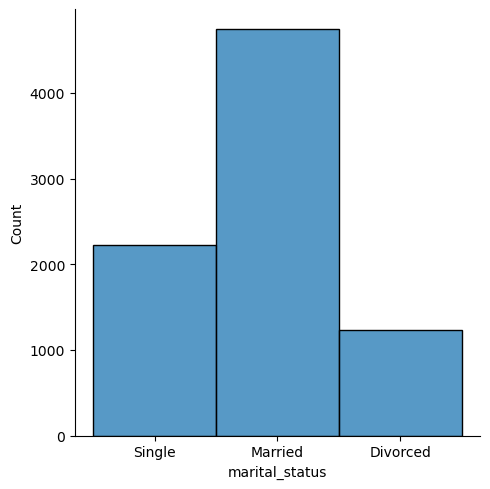

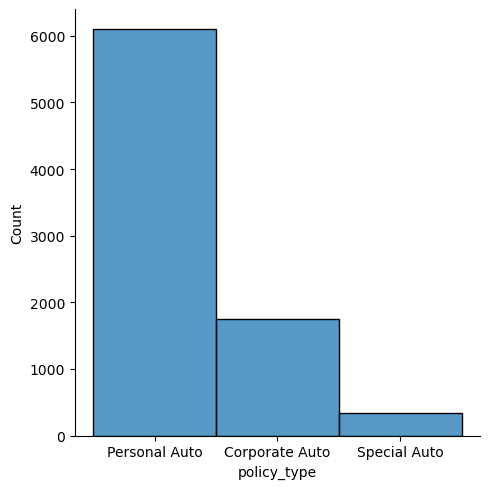

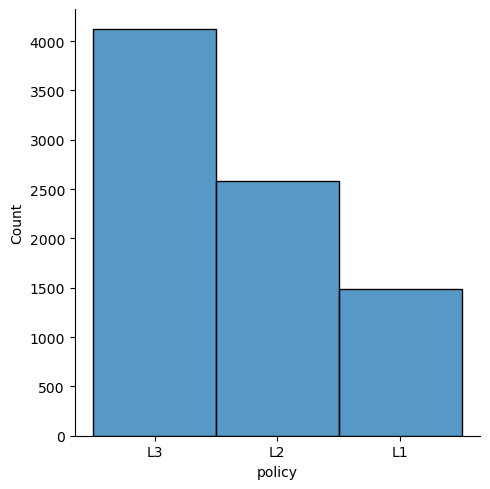

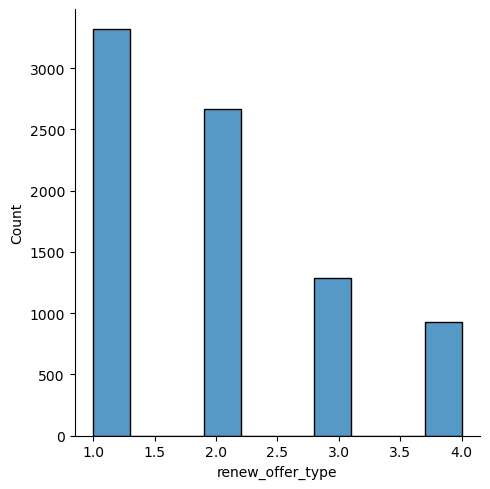

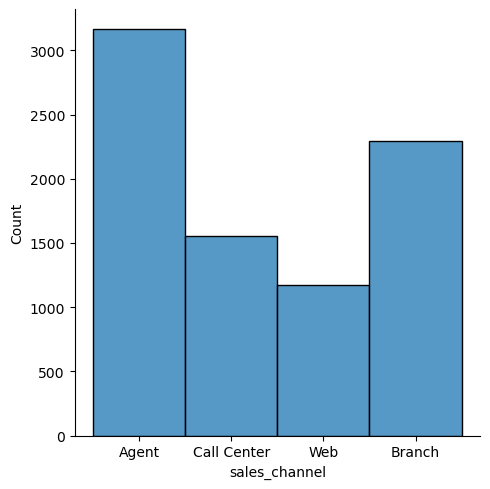

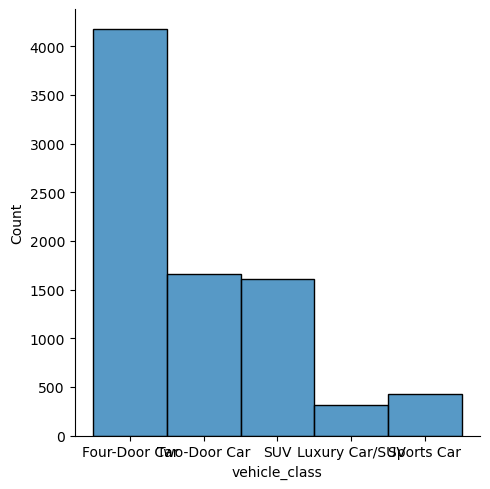

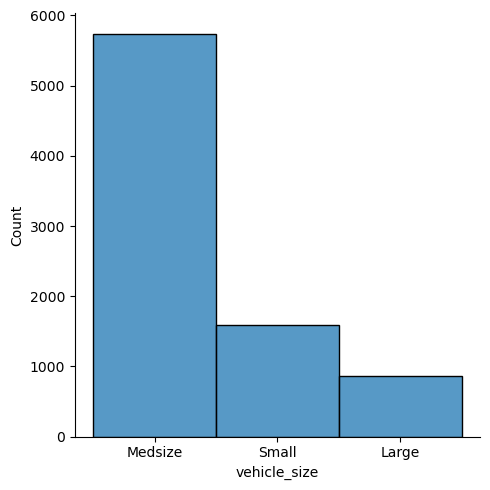

In [6]:
for column in df:     
    sns.displot(df[column], bins=10)
plt.show()

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?  Make any changes you feel are necessary.

1. State and location code

In [7]:
data_crosstab = pd.crosstab(df['state'], df['location_code'], margins = False)
data_crosstab

location_code,Rural,Suburban,Urban
state,,,
Arizona,288,951,258
California,534,1794,507
Nevada,158,493,128
Oregon,460,1497,412
Washington,138,459,115


In [8]:
st.chi2_contingency(data_crosstab)[1]

0.9693163326484684

State and location are independent

2. Education and employment status

In [9]:
data_crosstab_2 = pd.crosstab(df['education'], df['employment_status'], margins = False)
data_crosstab_2

employment_status,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,107,1533,117,85,626
College,91,1483,128,92,613
High School or Below,98,1366,107,65,703
Master or above,64,723,39,19,133


In [10]:
st.chi2_contingency(data_crosstab_2)[1]

3.9621465198014245e-21

Education and employment status are dependant

3. Vehicle class and vehicle size

In [11]:
data_crosstab_3 = pd.crosstab(df["vehicle_class"], df['vehicle_size'], margins = False)
data_crosstab_3

vehicle_size,Large,Medsize,Small
vehicle_class,,,
Four-Door Car,435,2910,830
Luxury Car/SUV,32,209,72
SUV,147,1170,295
Sports Car,46,321,63
Two-Door Car,196,1132,334


In [12]:
st.chi2_contingency(data_crosstab_3)[1]

0.015806906303756224

Vehicle class and vehicle size are slightly dependant

4. Coverage and vehicle class

In [13]:
data_crosstab_4 = pd.crosstab(df["coverage"], df['vehicle_class'], margins = False)
data_crosstab_4

vehicle_class,Four-Door Car,Luxury Car/SUV,SUV,Sports Car,Two-Door Car
coverage,,,,,
Basic,2528,170,1015,270,1030
Extended,1277,104,463,128,493
Premium,370,39,134,32,139


In [14]:
st.chi2_contingency(data_crosstab_4)[1]

0.11768938680611729

Coverage and vehicle class are independant

5. Coverage and vehicle size

In [15]:
data_crosstab_5 = pd.crosstab(df["coverage"], df['vehicle_size'], margins = False)
data_crosstab_5

vehicle_size,Large,Medsize,Small
coverage,,,
Basic,516,3510,987
Extended,279,1713,473
Premium,61,519,134


In [16]:
st.chi2_contingency(data_crosstab_5)[1]

0.23088369859734045

Coverage and vehicle classs are independant

6. State and vehicle class

In [17]:
data_crosstab_6 = pd.crosstab(df["state"], df['vehicle_class'], margins = False)
data_crosstab_6

vehicle_class,Four-Door Car,Luxury Car/SUV,SUV,Sports Car,Two-Door Car
state,,,,,
Arizona,795,48,280,82,292
California,1445,112,559,158,561
Nevada,393,32,144,44,166
Oregon,1168,96,489,121,495
Washington,374,25,140,25,148


In [18]:
st.chi2_contingency(data_crosstab_6)[1]

0.5572221222092886

State and vehicle class are independent

COMPLETE CHECK

In [19]:
#for big chi2
import os as os
from itertools import product
import scipy.stats as ss

df.columns.values.tolist()
cat1 = ('state',
 'response',
 'coverage',
 'education',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy',
 'policy_type',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size')
cat2 = ('state',
 'response',
 'coverage',
 'education',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy',
 'policy_type',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size')

In [20]:
# mix them into a big list to have them on both sides
cat_combos = list(product(cat1,cat2, repeat = 1))

In [21]:
# Creating an empty variable and picking only the p value from the output of Chi-Square test
result = []
for i in cat_combos:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df[i[0]], df[i[1]])))[1]))

In [22]:
#create a crosstab similar to corr()
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2','coeff'])
chi_test_output.round(4)

# Using pivot function to convert the above df into a crosstab
chi_test_output = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

#finds values less than the set condition, which is our p_value
test = chi_test_output.lt(0.05)
test

var2,coverage,education,employment_status,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
var1,,,,,,,,,,,,,,
coverage,False,False,True,True,True,False,False,False,True,False,False,False,False,False
education,False,False,True,False,True,True,False,False,True,True,False,False,False,False
employment_status,True,True,False,True,True,True,True,False,True,True,True,False,False,True
gender,True,False,True,False,True,True,False,False,True,False,False,False,False,False
location_code,True,True,True,True,False,True,False,False,True,True,False,False,True,True
marital_status,False,True,True,True,True,False,False,False,True,True,False,False,True,False
policy,False,False,True,False,False,False,False,True,False,False,False,False,False,False
policy_type,False,False,False,False,False,False,True,False,False,False,False,True,False,False
renew_offer_type,True,True,True,True,True,True,False,False,False,True,True,False,True,False


# 4. Plot time variable. Can you extract something from it?

Ploted before, not useful information. From the business perspective it's more usefil to know, what days you sell more (monday, tuesday, etc.) and which months (as all sales are in 2011)

# 5. The time variable can be useful. You shoud transform its data into a more useful form.
    Hint: Day, week, and month as integers might be useful.

In [23]:
#Check the min-max for the date-time 

df['effective_to_date'].min()

KeyError: 'effective_to_date'

In [ ]:

df['effective_to_date'].max()

In [ ]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

In [ ]:
df['Month'] = df['effective_to_date'].dt.month.map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['Day'] = df['effective_to_date'].dt.strftime('%A')  # %A represents the full weekday name


In [ ]:

df

In [ ]:
sns.displot(df["Month"], bins=2)
plt.show()

In [ ]:
sns.displot(df["Day"], bins=7)
plt.show()